In [1]:
from pandas import read_csv
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Read dataset from the csv file
filename = "E:\\Work\\FinalProjectData\\unsupervised_data.csv"
dataset  = read_csv(filename)

dataset

,name,address,phoneNumber,city,age,calls,activeCalls,sms,data,subscription_a,subscription_b,subscription_c,subscription_d,plan
0,A1,ADDRESS1,9001000201,Chennimalai,88,1,4,1,6,0,0,0,0,1
1,A2,ADDRESS2,9001000202,Karur,43,0,6,2,17,0,0,0,0,1
2,A3,ADDRESS3,9001000203,Salem,24,1,8,2,43,0,0,0,0,1
3,A4,ADDRESS4,9001000204,Salem,82,2,7,1,40,0,0,0,0,1
4,A5,ADDRESS5,9001000205,Chennai,60,0,12,1,11,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19000,A2711,ADDRESS2711,9001002911,Bangalore,29,10,21,92,3824,0,1,0,1,7
19001,A2712,ADDRESS2712,9001002912,Bangalore,29,30,39,96,2474,0,1,0,0,7
19002,A2713,ADDRESS2713,9001002913,Chennai,28,33,35,71,1309,1,1,0,0,7
19003,A2714,ADDRESS2714,9001002914,Chennai,34,13,19,95,2626,0,0,1,1,7


In [2]:
dataset.pop('name')
dataset.pop('phoneNumber')
dataset.pop('address')

le = LabelEncoder()
for col in dataset.columns:
    if col == 'city':
        le.fit(dataset[col])
        dataset[col] = le.transform(dataset[col])
        
dataset

,city,age,calls,activeCalls,sms,data,subscription_a,subscription_b,subscription_c,subscription_d,plan
0,2,88,1,4,1,6,0,0,0,0,1
1,5,43,0,6,2,17,0,0,0,0,1
2,9,24,1,8,2,43,0,0,0,0,1
3,9,82,2,7,1,40,0,0,0,0,1
4,1,60,0,12,1,11,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
19000,0,29,10,21,92,3824,0,1,0,1,7
19001,0,29,30,39,96,2474,0,1,0,0,7
19002,1,28,33,35,71,1309,1,1,0,0,7
19003,1,34,13,19,95,2626,0,0,1,1,7


In [17]:
features = ['city', 'age', 'calls', 'activeCalls', 'sms', 'data', 'subscription_a', 
            'subscription_b', 'subscription_c', 'subscription_d', 'plan']

X = dataset.loc[:, features].values
y = dataset.loc[:, ['plan']].values

X

array([[ 2, 88,  1, ...,  0,  0,  1],
       [ 5, 43,  0, ...,  0,  0,  1],
       [ 9, 24,  1, ...,  0,  0,  1],
       ...,
       [ 1, 28, 33, ...,  0,  0,  7],
       [ 1, 34, 13, ...,  1,  1,  7],
       [ 7, 39, 28, ...,  0,  1,  7]], dtype=int64)

In [18]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=7, random_state=0).fit(X)
kmeans.labels_

array([0, 0, 0, ..., 3, 1, 5])

In [19]:
y_kmeans = kmeans.predict(X)

In [20]:
kmeans.cluster_centers_

array([[ 4.56757938e+00,  5.36590446e+01,  4.35683076e+00,
         1.01814739e+01,  5.01179726e+00,  5.52557530e+01,
         1.76247905e-15,  4.49640325e-15, -6.57807142e-15,
         1.12146810e-02,  1.83454704e+00],
       [ 2.99398948e+00,  3.39909842e+01,  2.35552216e+01,
         3.37084899e+01,  4.04861007e+01,  2.80267017e+03,
         2.08114200e-01,  5.04883546e-01,  5.26671675e-01,
         4.86851991e-01,  6.41697971e+00],
       [ 2.90765492e+00,  3.61093560e+01,  2.48213852e+01,
         3.58396112e+01,  5.53219927e+01,  5.37550668e+03,
         5.09113001e-01,  4.82381531e-01,  4.72660996e-01,
         4.93317132e-01,  7.00000000e+00],
       [ 3.89879261e+00,  4.00326705e+01,  1.45479403e+01,
         2.25223722e+01,  2.38330966e+01,  1.04156676e+03,
         3.08948864e-02,  1.25355114e-01,  3.48721591e-01,
         4.91122159e-01,  5.00106534e+00],
       [ 3.00995406e+00,  3.46883614e+01,  2.33751914e+01,
         3.40826953e+01,  4.27243492e+01,  3.83813017e+03,
  

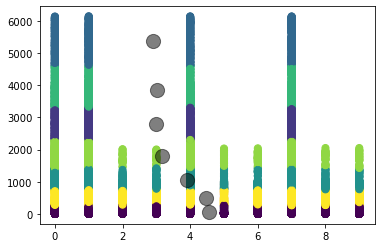

In [25]:
plt.scatter(X[:, 0], X[:, 5], c=y_kmeans, s=50, cmap='viridis');
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 5], c='black', s=200, alpha=0.5);

In [24]:
kmeans.predict([[2, 88,  1, 10, 12, 1024, 0, 0,  0,  1, 5]])

array([3])

In [31]:
kmeans.cluster_centers_[3]

array([3.89879261e+00, 4.00326705e+01, 1.45479403e+01, 2.25223722e+01,
       2.38330966e+01, 1.04156676e+03, 3.08948864e-02, 1.25355114e-01,
       3.48721591e-01, 4.91122159e-01, 5.00106534e+00])

In [32]:
center_3 = kmeans.cluster_centers_[3]

for i in center_3:
    print(format(i, ".4f"))

3.8988
40.0327
14.5479
22.5224
23.8331
1041.5668
0.0309
0.1254
0.3487
0.4911
5.0011
